# RNN으로 텍스트 분석하기
* RNN : 순환신경망
* 언어나 시계열 데이터 분석에 주로 사용되는 신경망
* 길이가 길어지면 기울기 소실문제 발생
* LSTM, GRU 등으로 문제를 보완

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np

# tensorflow에서 텍스트 전처리하기
* 토큰화 : 문장을 단어 혹은 형태소로 쪼개는 것
* one-hot encoding : 문자를 벡터화
* 임베딩(embedding) : 벡터화 → one-hot encoding 축소

In [3]:
text = '해보지 않으면 해낼 수 없다'

In [4]:
result = text_to_word_sequence(text)
result

['해보지', '않으면', '해낼', '수', '없다']

## 단어 빈도수 세기

In [5]:
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다',
        '텍스트의 단어로 토큰화해야 딥러닝에서 인시됩니다',
        '토큰화한 결과는 딥러닝에서 사용할 수 있습니다',
        '텍스트 전처리에는 벡터화 one-hot encoding padding으로 길이 맞추기 등이 필요합니다',
        '딥러닝 쉽지 않네요']

In [7]:
token = Tokenizer()
token.fit_on_texts(docs)
print('단어 카운트 :', token.word_counts, end='\n\n')
print('문장 카운트 :', token.document_count, end='\n\n')
print('각 단어가 몇 개의 문장에 포함되어 있는지 계산 :', token.word_docs, end='\n\n')
print('각 단어에 매겨진 인덱스값 :', token.word_index, end='\n\n')

단어 카운트 : OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 1), ('합니다', 1), ('단어로', 1), ('토큰화해야', 1), ('딥러닝에서', 2), ('인시됩니다', 1), ('토큰화한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1), ('텍스트', 1), ('전처리에는', 1), ('벡터화', 1), ('one', 1), ('hot', 1), ('encoding', 1), ('padding으로', 1), ('길이', 1), ('맞추기', 1), ('등이', 1), ('필요합니다', 1), ('딥러닝', 1), ('쉽지', 1), ('않네요', 1)])

문장 카운트 : 5

각 단어가 몇 개의 문장에 포함되어 있는지 계산 : defaultdict(<class 'int'>, {'나누어': 1, '합니다': 1, '텍스트의': 2, '각': 1, '먼저': 1, '토큰화': 1, '단어를': 1, '인시됩니다': 1, '단어로': 1, '딥러닝에서': 2, '토큰화해야': 1, '있습니다': 1, '사용할': 1, '수': 1, '결과는': 1, '토큰화한': 1, '등이': 1, '텍스트': 1, 'one': 1, 'padding으로': 1, '전처리에는': 1, '벡터화': 1, '길이': 1, 'hot': 1, 'encoding': 1, '맞추기': 1, '필요합니다': 1, '쉽지': 1, '딥러닝': 1, '않네요': 1})

각 단어에 매겨진 인덱스값 : {'텍스트의': 1, '딥러닝에서': 2, '먼저': 3, '각': 4, '단어를': 5, '나누어': 6, '토큰화': 7, '합니다': 8, '단어로': 9, '토큰화해야': 10, '인시됩니다': 11, '토큰화한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16, '텍스트': 17, '전처리에는': 18, 

In [8]:
x = token.texts_to_sequences(docs)
print(x)

[[3, 1, 4, 5, 6, 7, 8], [1, 9, 10, 2, 11], [12, 13, 2, 14, 15, 16], [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], [28, 29, 30]]


## 가장 긴 벡터의 길이 추출

In [9]:
max([len(i) for i in x])

11

## 가장 긴 길이의 문장에 맞추어 패딩
* 가장 긴 문장 길이 +1의 길이로 패딩
* 문장의 시작에는 반드시 0이 있어야함

In [10]:
padded_x = pad_sequences(x, max([len(i) for i in x])+1)
padded_x

array([[ 0,  0,  0,  0,  0,  3,  1,  4,  5,  6,  7,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  9, 10,  2, 11],
       [ 0,  0,  0,  0,  0,  0, 12, 13,  2, 14, 15, 16],
       [ 0, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 28, 29, 30]], dtype=int32)

## 텍스트를 읽고 긍정, 부정 예측하기

In [11]:
docs2 = [
    '너무 재미있네요',
    '최고예요',
    '참 신기한 딥러닝이네요',
    '인공지능 칭찬합니다',
    '더 자세히 배우고 싶어요',
    '변화가 너무 빨라요',
    'GPT 성능이 생각보다 별로네요',
    '제미나이보다는 낫죠',
    '나는 차라리 라마를 쓴다',
    '유료 결제 싫어요'
]

In [12]:
classes = np.array([1,1,1,1,1,0,0,1,0,0])

In [13]:
token = Tokenizer()
token.fit_on_texts(docs2)
print(token.word_index)

{'너무': 1, '재미있네요': 2, '최고예요': 3, '참': 4, '신기한': 5, '딥러닝이네요': 6, '인공지능': 7, '칭찬합니다': 8, '더': 9, '자세히': 10, '배우고': 11, '싶어요': 12, '변화가': 13, '빨라요': 14, 'gpt': 15, '성능이': 16, '생각보다': 17, '별로네요': 18, '제미나이보다는': 19, '낫죠': 20, '나는': 21, '차라리': 22, '라마를': 23, '쓴다': 24, '유료': 25, '결제': 26, '싫어요': 27}


In [16]:
x = token.texts_to_sequences(docs2)

In [17]:
padding_x = pad_sequences(x, max([len(i) for i in x])+1)
padding_x

array([[ 0,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  3],
       [ 0,  0,  4,  5,  6],
       [ 0,  0,  0,  7,  8],
       [ 0,  9, 10, 11, 12],
       [ 0,  0, 13,  1, 14],
       [ 0, 15, 16, 17, 18],
       [ 0,  0,  0, 19, 20],
       [ 0, 21, 22, 23, 24],
       [ 0,  0, 25, 26, 27]], dtype=int32)

## 임베딩

In [18]:
word_size = len(token.word_index) + 1
word_size

28

In [21]:
Embedding(word_size, 8)

<Embedding name=embedding_1, built=False>

In [22]:
model = Sequential()
model.add(Embedding(word_size, 8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(padding_x, classes, epochs=20)
print(model.evaluate(padding_x, classes))

I0000 00:00:1747810075.183595    1046 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Epoch 1/20


I0000 00:00:1747810077.077151    1195 service.cc:152] XLA service 0x7f31b8019580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747810077.077233    1195 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-21 15:47:57.393981: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747810077.893404    1195 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7000 - loss: 0.6867
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7000 - loss: 0.6843

I0000 00:00:1747810079.201011    1195 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.7000 - loss: 0.6843
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7000 - loss: 0.6819
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7000 - loss: 0.6795
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7000 - loss: 0.6771
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.8000 - loss: 0.6748
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8000 - loss: 0.6724
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8000 - loss: 0.6700
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8000 - loss: 0.6676
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.8000 - loss: 0.6652
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9000 - loss: 0.6628
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9000 - loss: 0.6604
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9000 - loss: 0.6579
Ep

# RNN으로 금융앱 리뷰 분석하기

In [24]:
!pip install konlpy

  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 131.0 kB/s eta 0:00:00a 0:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [konlpy]2m2/3 [konlpy]


In [1]:
from konlpy.tag import Mecab
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import to_categorical

2025-05-23 10:23:59.124098: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-23 10:23:59.388092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747963439.488285     864 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747963439.514460     864 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747963439.733938     864 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [7]:
train_data = pd.read_csv('../05_Machine_Learning/data/bank_app_reviews_train.csv')

In [29]:
train_data.head()

,리뷰일,평점,사용자리뷰,업체답변,은행명
0,2023-12-21,5,엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 ㅎㅎ 저도 쓰고있음!,NaN,하나
1,2025-02-17,1,Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...,안녕하세요. 신한은행입니다.\n먼저 SOL사용에 불편을 드려 죄송합니다.\n어플의 ...,신한
2,2024-07-26,5,서비스가 통합되어 있어서 점점 사용빈도가 높아지네요.,고객님 안녕하세요! KB스타뱅킹을 이용해 주셔서 진심으로 감사드립니다. KB스타뱅킹...,국민
3,2024-09-01,1,카드 충천이 안됌,"안녕하세요. 전민구 님, 토스팀입니다. 남겨주신 내용만으로는 겪고계신 불편사항의 자...",토스
4,2023-11-13,1,알뜰폰 인증이 안돼요.....,"안녕하세요 헤이모두들안녕님, 우리은행입니다. 먼저 이용에 불편을 드려 매우 죄송합니...",우리


## 특수문자 제거 함수

In [8]:
import re

def clean_text(text):
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text) # 한글, 영문, 숫자 추출
    cleaned = re.sub(r'\s+',' ', cleaned) # 연속된 공백을 하나의 공백으로 줄임
    return cleaned.strip()

### 사용자리뷰 특수문자 제거

In [9]:
train_data['사용자리뷰'] = train_data['사용자리뷰'].apply(clean_text)

In [34]:
train_data['사용자리뷰']

0                  엄빠 폰에 설치해드렸는데 두분 다 쓰기 편하다고 하시네요 저도 쓰고있음
1        Cd기 축소 연장하려면 이 어플 깔라는데 왜 30퍼에서 안깔리는지 아니 애초에 슈퍼...
2                             서비스가 통합되어 있어서 점점 사용빈도가 높아지네요
3                                                카드 충천이 안됌
4                                              알뜰폰 인증이 안돼요
                               ...                        
22241                                      어플 시작오류가 가끔 나네요
22242                              업데이트 후에 계좌이체하는 게 자주 튕겨요
22243                                                  굳굳굳
22244                                  오래시간 같이한 나의은행 든든합니다
22245    라이브 광고 전보다 더 안좋네 아무리 주기 싫어도 겨우 3원줄거면서 너무 쪼잔하게 ...
Name: 사용자리뷰, Length: 22246, dtype: object

## is_good 컬럼 추가
* 평점 4 이상은 긍정 : 1
* 평점 3 이하는 부정 : 0

In [10]:
train_data['is_good'] = train_data['평점'].apply(lambda x : 1 if x >3 else 0)

In [37]:
train_data['is_good']

0        1
1        0
2        1
3        0
4        0
        ..
22241    0
22242    0
22243    1
22244    1
22245    0
Name: is_good, Length: 22246, dtype: int64

## 토큰화

In [7]:
# !pip install mecab-python3

In [11]:
mecab = Mecab()
mecab.morphs(train_data['사용자리뷰'][0])

['엄',
 '빠',
 '폰',
 '에',
 '설치',
 '해',
 '드렸',
 '는데',
 '두',
 '분',
 '다',
 '쓰',
 '기',
 '편하',
 '다고',
 '하',
 '시',
 '네요',
 '저',
 '도',
 '쓰',
 '고',
 '있',
 '음']

## 전체 문장을 토큰화 한 후 tokenized_docs에 저장

In [12]:
tokenized_docs = train_data['사용자리뷰'].apply(mecab.morphs)

In [9]:
tokenized_docs

0        [엄, 빠, 폰, 에, 설치, 해, 드렸, 는데, 두, 분, 다, 쓰, 기, 편하,...
1        [Cd, 기, 축소, 연장, 하, 려면, 이, 어, 플, 깔, 라는데, 왜, 30,...
2        [서비스, 가, 통합, 되, 어, 있, 어서, 점점, 사용, 빈도, 가, 높, 아,...
3                                        [카드, 충천, 이, 안, 됌]
4                                    [알뜰, 폰, 인증, 이, 안, 돼요]
                               ...                        
22241                         [어, 플, 시작, 오류, 가, 가끔, 나, 네요]
22242               [업데이트, 후, 에, 계좌, 이체, 하, 는, 게, 자주, 튕겨요]
22243                                            [굳, 굳, 굳]
22244                   [오래, 시간, 같이, 한, 나, 의, 은행, 든든, 합니다]
22245    [라이브, 광고, 전, 보다, 더, 안, 좋, 네, 아무리, 주기, 싫, 어도, 겨...
Name: 사용자리뷰, Length: 22246, dtype: object

## 단어 인덱스 생성

In [13]:
token = Tokenizer(lower=False)
token.fit_on_texts(tokenized_docs)
print(len(token.word_index))

13010


## 문장 벡터화

In [14]:
x = token.texts_to_sequences(tokenized_docs)
print(x[0])

[5400, 1682, 170, 11, 159, 37, 2292, 14, 301, 184, 28, 45, 19, 106, 123, 1, 76, 15, 216, 5, 45, 2, 10, 64]


## 가장 긴 문장의 길이 구하기

In [15]:
max_length = max([len(i) for i in x]) + 1

In [14]:
max_length

302

## 가장 긴 길이에 맞춰서 패딩
* RNN의 경우 패딩을 post로 주는 것이 더 좋음
    * post : 중요한 단어가 앞, 0이 뒤에 붙는 형태
* Transformer 계열의 경우 위치 정보가 따로 있으므로 post, pre든 차이가 없음

In [16]:
X_padded = pad_sequences(x, maxlen=max_length, padding='post')
print(X_padded[0])

[5400 1682  170   11  159   37 2292   14  301  184   28   45   19  106
  123    1   76   15  216    5   45    2   10   64    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [19]:
X_padded.shape

(22246, 302)

In [17]:
y = train_data['is_good']
y.value_counts()

is_good
1    13240
0     9006
Name: count, dtype: int64

## 홀드아웃

In [23]:
# !pip install scikit-learn

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X_padded, y, test_size=0.3, stratify=y, random_state=42)

In [20]:
# embedding에 입력할 단어 수 추출
word_size = len(token.word_index) + 1
print(word_size)

13011


## 양방향 RNN 네트워크를 이용해 텍스트 분석

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, SimpleRNN, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
birnn = Sequential()
birnn.add(Input(shape=(max_length,)))
birnn.add(Embedding(input_dim=word_size, output_dim=64))
birnn.add(Bidirectional(SimpleRNN(128, return_sequences=False, activation='tanh')))
birnn.add(Dense(32, activation='relu'))
birnn.add(Dropout(0.5))
birnn.add(Dense(1, activation='sigmoid'))
birnn.summary()

I0000 00:00:1747813938.589735    1831 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1347 MB memory:  -> device: 0, name: NVIDIA GeForce MX450, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 302, 64)        │       832,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890,369 (3.40 MB)

 Trainable params: 890,369 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
birnn.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model_path = './model/bank_app_review_birnn.keras'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                             save_best_only=True,
                             verbose=1)
birnn_history = birnn.fit(X_train, y_train, epochs=1000, batch_size=256,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stop, checkpoint])

Epoch 1/1000


I0000 00:00:1747814924.484058    1948 service.cc:152] XLA service 0x55a12aec0a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747814924.484096    1948 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX450, Compute Capability 7.5
2025-05-21 17:08:44.559328: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747814924.910131    1948 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/61 ━━━━━━━━━━━━━━━━━━━━ 4:42 5s/step - accuracy: 0.5625 - auc: 0.5964 - loss: 0.6860

I0000 00:00:1747814927.288757    1948 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.7047 - auc: 0.7565 - loss: 0.5683
Epoch 1: val_loss improved from inf to 0.33819, saving model to ./model/bank_app_review_birnn.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 251ms/step - accuracy: 0.7057 - auc: 0.7577 - loss: 0.5672 - val_accuracy: 0.8604 - val_auc: 0.9299 - val_loss: 0.3382
Epoch 2/1000
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.8725 - auc: 0.9267 - loss: 0.3385
Epoch 2: val_loss improved from 0.33819 to 0.31916, saving model to ./model/bank_app_review_birnn.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 22s 371ms/step - accuracy: 0.8724 - auc: 0.9266 - loss: 0.3388 - val_accuracy: 0.8668 - val_auc: 0.9379 - val_loss: 0.3192
Epoch 3/1000
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.8990 - auc: 0.9437 - loss: 0.2911
Epoch 3: val_loss improved from 0.31916 to 0.28771, saving model to ./model/bank_app_review_birnn.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 33s 532ms/step - accuracy: 0.8990 - auc: 0.9438 - loss: 0.2909 - val_acc

NameError: name 'plt' is not defined

In [22]:
import matplotlib.pyplot as plt

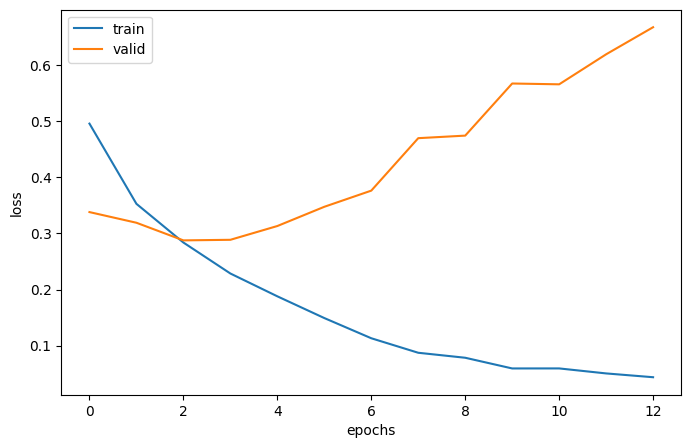

In [34]:
plt.figure(figsize=(8,5))
plt.plot(birnn_history.history['loss'])
plt.plot(birnn_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

In [35]:
print(birnn.evaluate(X_valid, y_valid))

209/209 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.8962 - auc: 0.9519 - loss: 0.2766
[0.28771471977233887, 0.8880731463432312, 0.9486808776855469]


In [39]:
pred = pd.DataFrame(birnn.predict(X_valid))
pred

209/209 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step


,0
0,0.992618
1,0.694041
2,0.084488
3,0.983700
4,0.048323
...,...
6669,0.023351
6670,0.904542
6671,0.954437
6672,0.128787


In [37]:
y_valid.reset_index(drop=True)

0       1
1       1
2       0
3       1
4       0
       ..
6669    0
6670    1
6671    1
6672    0
6673    1
Name: is_good, Length: 6674, dtype: int64

In [41]:
result = pd.concat([y_valid, pred], axis=1)

In [43]:
result.columns = ['is_good', 'pred']

In [45]:
result['pred'] = result['pred'].apply(lambda x : 1 if x > 0.5 else 0)

In [49]:
result = result.dropna()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(result['is_good'], result['pred']))

              precision    recall  f1-score   support

         0.0       0.40      0.81      0.54      2702
         1.0       0.58      0.18      0.27      3972

    accuracy                           0.43      6674
   macro avg       0.49      0.49      0.40      6674
weighted avg       0.51      0.43      0.38      6674



# LSTM과 CNN 조합 모델로 분석

In [23]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, GlobalMaxPooling1D

In [53]:
lstm_cnn = Sequential()
lstm_cnn.add(Input(shape=(max_length,)))
lstm_cnn.add(Embedding(input_dim=word_size, output_dim=128))
lstm_cnn.add(Dropout(0.3))
lstm_cnn.add(Conv1D(128, 5, padding='valid', activation='relu'))
lstm_cnn.add(MaxPooling1D(pool_size=4))
lstm_cnn.add(Conv1D(128, 5, padding='valid', activation='relu'))
lstm_cnn.add(MaxPooling1D(pool_size=4))
lstm_cnn.add(Bidirectional(LSTM(256, return_sequences=True)))
lstm_cnn.add(GlobalMaxPooling1D())
lstm_cnn.add(Dense(64, activation='relu'))
lstm_cnn.add(Dropout(0.3))
lstm_cnn.add(Dense(32, activation='relu'))
lstm_cnn.add(Dense(1, activation='sigmoid'))
lstm_cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 302, 128)       │     1,665,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 302, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 298, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 74, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 70, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 17, 512)        │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 512)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,652,929 (10.12 MB)

 Trainable params: 2,652,929 (10.12 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
lstm_cnn.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model_path = './model/bank_app_review_lstm_cnn.keras'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                             save_best_only=True,
                             verbose=1)
lstm_cnn_history = lstm_cnn.fit(X_train, y_train, epochs=1000, batch_size=128,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stop, checkpoint])

plt.figure(figsize=(8,5))
plt.plot(lstm_cnn_history.history['loss'])
plt.plot(lstm_cnn_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

Epoch 1/1000


2025-05-21 17:44:34.610066: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-05-21 17:44:35.249673: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.08GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


121/122 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.7357 - auc: 0.7776 - loss: 0.5280

2025-05-21 17:45:50.871514: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.68GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.7364 - auc: 0.7784 - loss: 0.5272
Epoch 1: val_loss improved from inf to 0.33883, saving model to ./model/bank_app_review_lstm_cnn.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 174s 781ms/step - accuracy: 0.7370 - auc: 0.7792 - loss: 0.5264 - val_accuracy: 0.8707 - val_auc: 0.9319 - val_loss: 0.3388
Epoch 2/1000
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.8950 - auc: 0.9386 - loss: 0.2925
Epoch 2: val_loss improved from 0.33883 to 0.29115, saving model to ./model/bank_app_review_lstm_cnn.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 91s 748ms/step - accuracy: 0.8950 - auc: 0.9386 - loss: 0.2925 - val_accuracy: 0.8861 - val_auc: 0.9475 - val_loss: 0.2912
Epoch 3/1000
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.9273 - auc: 0.9685 - loss: 0.2070
Epoch 3: val_loss did not improve from 0.29115
122/122 ━━━━━━━━━━━━━━━━━━━━ 91s 745ms/step - accuracy: 0.9273 - auc: 0.9685 - loss: 0.2071 - val_accuracy: 0.8872 - val_auc: 0.9487 - val_

KeyboardInterrupt: 

# Attention → GPT
* RNN이나 LSTM은 전체 문장을 기억
* 중요한 단어에만 집중

In [2]:
# !pip install attention

In [3]:
from attention import Attention

In [24]:
from tensorflow.keras.models import Model

In [28]:
from tensorflow.keras.layers import GlobalAveragePooling1D, LayerNormalization, MultiHeadAttention, Input, Add

In [30]:
inputs = Input(shape=(max_length,))
x = Embedding(input_dim=word_size, output_dim=128)(inputs)
x = Dropout(0.3)(x)
# 양방향 LSTM
x = Bidirectional(LSTM(128, return_sequences=True))(x)
# multihead attention
attn_output = MultiHeadAttention(num_heads=4, key_dim=64)(x,x)
attn_output = Dropout(0.3)(attn_output)
x = Add()([x, attn_output])
x = LayerNormalization()(x)
x = GlobalAveragePooling1D()(x)
# DNN
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
# 출력층
outputs = Dense(1, activation='sigmoid')(x)
attn_model = Model(inputs=inputs, outputs=outputs)
attn_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 302)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 302, 128)  │  1,665,408 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 302, 128)  │          0 │ embedding_4[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 302, 256)  │    263,168 │ dropout_13[0][0]  │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 302, 256)  │    263,168 │ bidirectional_4[… │
│ (MultiHeadAttentio… │                   │            │ bidirectional_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 302, 256)  │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 302, 256)  │          0 │ bidirectional_4[… │
│                     │                   │            │ dropout_15[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 302, 256)  │        512 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 256)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 128)       │          0 │ dense_4[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64)        │      8,256 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │      2,080 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         33 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,235,521 (8.53 MB)

 Trainable params: 2,235,521 (8.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000


I0000 00:00:1747878462.435020     665 cuda_dnn.cc:529] Loaded cuDNN version 90300


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.5986 - auc: 0.5895 - loss: 0.6635
Epoch 1: val_loss improved from inf to 0.42978, saving model to ./model/bank_app_review_attn_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 81s 629ms/step - accuracy: 0.5990 - auc: 0.5903 - loss: 0.6631 - val_accuracy: 0.7758 - val_auc: 0.9120 - val_loss: 0.4298
Epoch 2/1000
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.8267 - auc: 0.8925 - loss: 0.3940
Epoch 2: val_loss improved from 0.42978 to 0.29050, saving model to ./model/bank_app_review_attn_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 76s 625ms/step - accuracy: 0.8270 - auc: 0.8927 - loss: 0.3937 - val_accuracy: 0.8912 - val_auc: 0.9473 - val_loss: 0.2905
Epoch 3/1000
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.9132 - auc: 0.9546 - loss: 0.2460
Epoch 3: val_loss improved from 0.29050 to 0.26963, saving model to ./model/bank_app_review_attn_model.keras
122/122 ━━━━━━━━━━━━━━━━━━━━ 74s 609ms/step - accuracy: 0.9132 - auc: 0.95

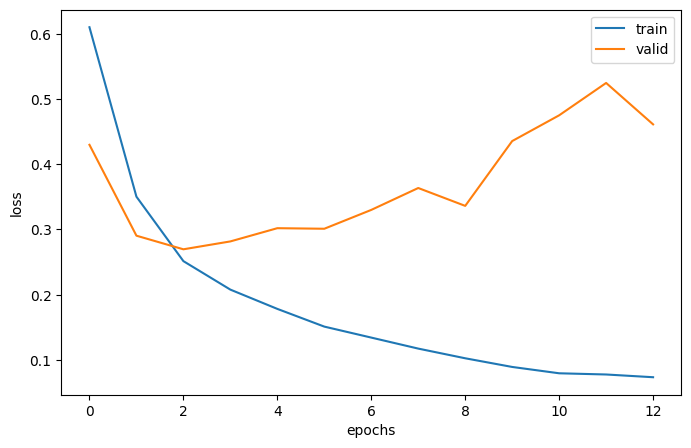

In [31]:
attn_model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
model_path = './model/bank_app_review_attn_model.keras'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                             save_best_only=True,
                             verbose=1)
attn_model_history = attn_model.fit(X_train, y_train, epochs=1000, batch_size=128,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stop, checkpoint])

plt.figure(figsize=(8,5))
plt.plot(attn_model_history.history['loss'])
plt.plot(attn_model_history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])
plt.show()

In [32]:
print(attn_model.evaluate(X_valid, y_valid))

209/209 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8991 - auc: 0.9569 - loss: 0.2578
[0.269627183675766, 0.8937668800354004, 0.953049898147583]


In [33]:
import joblib

In [35]:
joblib.dump(token, './model/bank_app_tokenizer.joblib')
joblib.dump(max_length, './model/bank_app_max_length.joblib')

['./model/bank_app_max_length.joblib']